In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/1664159650iris.csv")

In [ ]:
df

,04375,P00214642,F,26-35,5,B,1,0,11,13,16,4627
0,1004375,P00036842,F,26-35,5,B,1,0,1,14.0,16.0,15518
1,1004375,P00075742,F,26-35,5,B,1,0,8,14.0,NaN,9772
2,1004375,P00221542,F,26-35,5,B,1,0,5,15.0,NaN,7011
3,1004375,P00313342,F,26-35,5,B,1,0,5,NaN,NaN,6918
4,1004375,P00227642,F,26-35,5,B,1,0,1,5.0,14.0,15913
...,...,...,...,...,...,...,...,...,...,...,...,...
482303,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
482304,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
482305,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
482306,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482308 entries, 0 to 482307
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   04375      482308 non-null  int64  
 1   P00214642  482308 non-null  object 
 2   F          482308 non-null  object 
 3   26-35      482308 non-null  object 
 4   5          482308 non-null  int64  
 5   B          482308 non-null  object 
 6   1          482308 non-null  object 
 7   0          482308 non-null  int64  
 8   11         482308 non-null  int64  
 9   13         329906 non-null  float64
 10  16         146207 non-null  float64
 11  4627       482308 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 44.2+ MB


In [ ]:
df.dtypes

04375          int64
P00214642     object
F             object
26-35         object
5              int64
B             object
1             object
0              int64
11             int64
13           float64
16           float64
4627           int64
dtype: object

In [ ]:
df.count()

04375        225871
P00214642    225871
F            225871
26-35        225871
5            225871
B            225871
1            225871
0            225871
11           225871
13           156163
16            69415
4627         225871
dtype: int64

In [ ]:
df.isna().sum()

04375             0
P00214642         0
F                 0
26-35             0
5                 0
B                 0
1                 0
0                 0
11                0
13           152402
16           336101
4627              0
dtype: int64

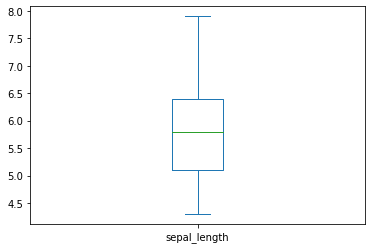

In [ ]:
df.sepal_length.plot(kind="box")

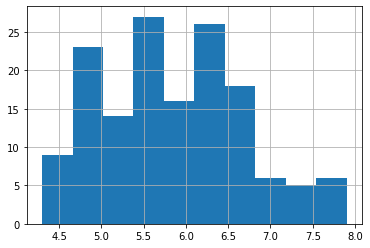

In [ ]:
df.sepal_length.hist()

In [ ]:
df.sepal_length.skew() # Data seems positively skewed; We need to do some transformation to bring our data to normal shape

0.3149109566369728

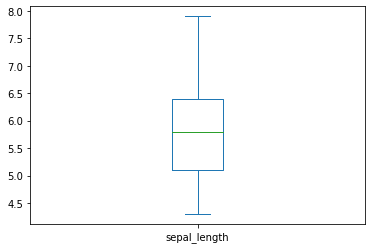

In [ ]:
#Boxplot
df.sepal_length.plot(kind="box")# No outlier is present

In [ ]:
min=df.sepal_length.min()
min

4.3

In [ ]:
max=df.sepal_length.max()
max

7.9

In [ ]:
Q1=df.sepal_length.quantile(0.25)
Q2=df.sepal_length.quantile(0.5)
Q3=df.sepal_length.quantile(0.75)
print(Q1,Q2,Q3)

5.1 5.8 6.4


In [ ]:
#Calculate Interquartile Range
IQR=(Q3-Q1)

In [ ]:
Upper_cutoff=(Q3+1.5*IQR)
Lower_cutoff=(Q1-1.5*IQR)
print(Upper_cutoff, Lower_cutoff)
if Lower_cutoff<min:
    print("There is no Outlier on Lower Side")
elif Upper_cutoff>max:
    print("There is no Outlier on higher side")



8.350000000000001 3.1499999999999986
There is no Outlier on Lower Side


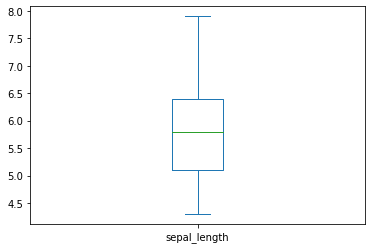

In [ ]:
df.sepal_length.plot(kind="box")

In [ ]:
#Replace the outliers by uppercutoff: as outliers exists at upper side so we will replace outliers by upper cutoff
df.sepal_length.clip(upper=Upper_cutoff,inplace=True)

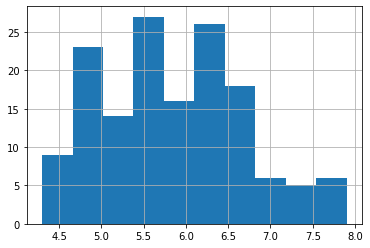

In [ ]:
#Histogram
df.sepal_length.hist()

In [ ]:
df.sepal_length.skew()

0.3149109566369728

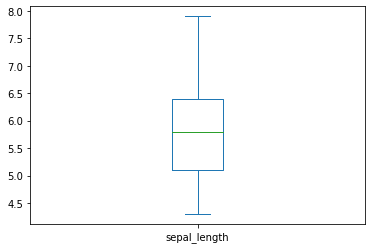

In [ ]:
#Boxplot
df.sepal_length.plot(kind="box")# No outlier is present

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

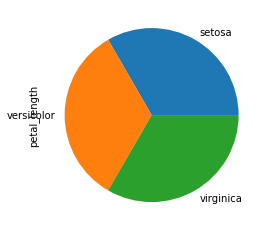

In [ ]:
df.groupby("species").petal_length.count().plot(kind="pie")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


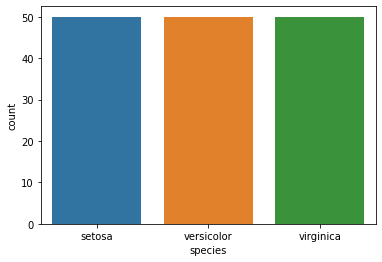

In [ ]:
sns.countplot(df.species)

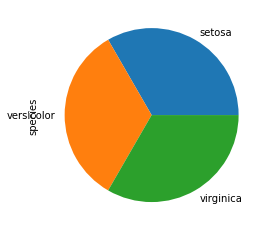

In [ ]:
#composition of species
df.groupby("species").species.count().plot(kind="pie")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


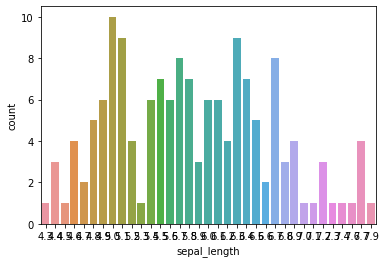

In [ ]:
# Distribution of species
sns.countplot(df.sepal_length)

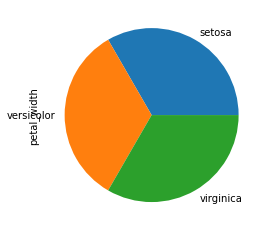

In [ ]:
#Find the composition of species based on petal_width
df.groupby("species").petal_width.count().plot(kind="pie")

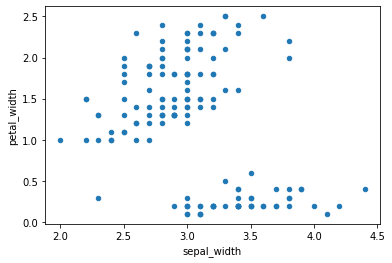

In [ ]:
df.plot(x="sepal_width", y="petal_width", kind= "scatter")

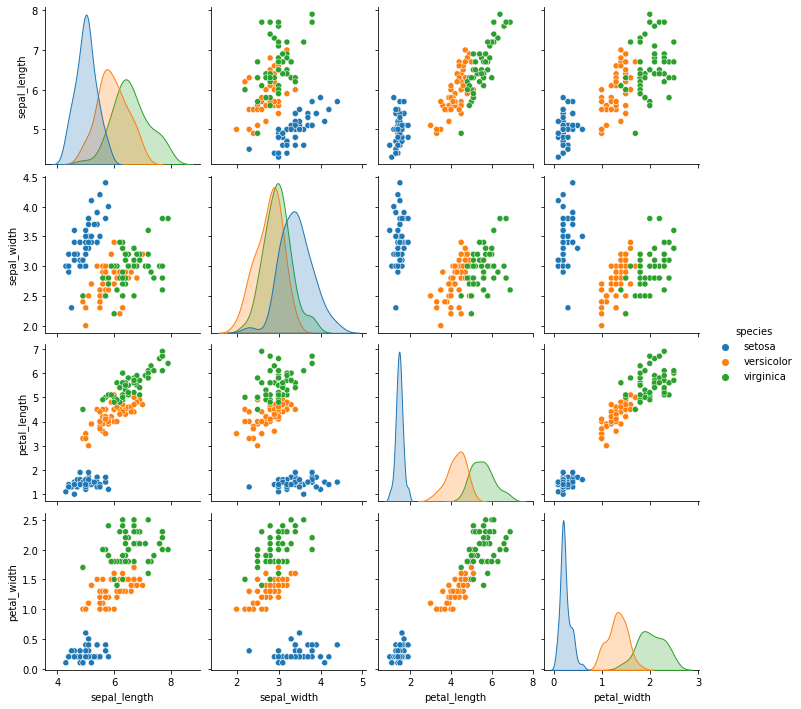

In [ ]:
#Pairplot
sns.pairplot(data=df, hue="species")

In [ ]:
#Correlation
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


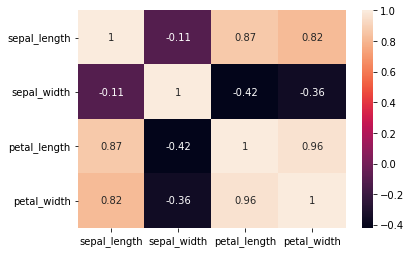

In [ ]:
#Heatmap
sns.heatmap(df.corr(),annot=True)